## Network Analytics HW1
## Name : Seongmin Lee (CID: 01247436)


In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import networkx as nx
import string

 ## 1 - a)
- When it comes to the sum of each node degree, the each edge is counted  twice, which makes the twice number of the edges 'm'(2m). In addition, the set of edges without a direction is same as the number of edges, which indicates the sum of each node degree(deg(v)) is twice greater than the number of edge set(2|E|).

## 1 - b)
- A outdegree for one node is always an indegree for another linked node in a directed graph, which indicates that the sum of indegree for all nodes is same as the sum of outdegfree for all nodes. For instance, there are 100 people who exchange a certain limited money with one another. In this case, the sum of the income for all people is same as the sum of the outcome for all people.

## 2 - a) 
- If a connected network with the 'n' number of nodes and 'n' number of edges, the network has a cycle, which means it is not a tree anymore. As depicted, there is an example with 3 nodes and 3 edges in a tree, which shows a cycle. However, a connected graph with the n nodes and n-1 edges creates a tree because n nodes with n-1 edges cannot form a cycle.

In [20]:
plt.rcParams['figure.figsize'] = (2, 3)
def tree_example(node_num, edge_num):
    K = nx.Graph()
    node_list = list(range(1,node_num+1)) #generate the node list
    K.add_nodes_from(node_list) 
    for i in range(1, edge_num+1):
        if i < node_num: # a tree
            K.add_edge(i, i+1)
        elif i == node_num: # a cycle
            K.add_edge(i-node_num+1, node_num)
    nx.draw(K)

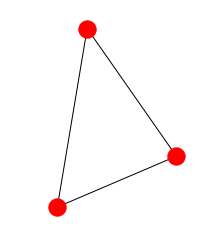

In [21]:
# Exmaple for 2-a) 3 nodes with 3 edges
tree_example(node_num = 3, edge_num= 3)

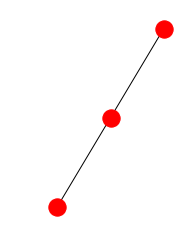

In [22]:
# # Exmaple for 2-a) 3(n) nodes with 3(n-1) edges
tree_example(node_num = 3, edge_num= 2)

## 2 - b) 
- The main characteristic of a tree is no cycle, which indicates that there must be at least three nodes with only two edges to form a tree as above. if one of the leaves has more than one edge, then the leave cannot be a leave, but it can form a cycle or a root to create a leave. However, if a network is not a tree, there is no constraint for the leaves with one link.

## 2 - c) 
- In a tree, there is no cycle, which also means there is no other path between any two nodes, but there is only one way to go along. If there are more than one path between any two nodes, the network is not a tree because there is at least a cycle.

## 3)
- By cutting the numbered node and the edge linked to the next numbering node, we can see every arc go from a lower-numbered node to a higher-numbered node. Supposed there is a DAG with nodes (A to Z), we can cut the start node A, which does not have any indegree edges, and remove the every edge linked to the node A. The network is still a DAG. And we label the node A as 1. Once again, we pick a node without any incoming edges to remove the node and the linked edges, and label the node as 2. At the end, the DAG will have no nodes and edges with the number labeling in an ascending order.

## Excercise 2

In [2]:
stocks_data = pd.read_csv('HW1_asset_prices.csv', index_col='Date')

In [3]:
#Colname Abbreviation
col_name = []
for i in list(stocks_data.columns):
    name = i.split('~')[1].split('.')[0]
    col_name.append(name)

In [4]:
stocks_data = pd.read_csv('HW1_asset_prices.csv', header=0, names = col_name)

In [5]:
stocks_data.shape

(1013, 39)

### Calculation of return

In [27]:
#calculation of return
for col in stocks_data.columns:
    result = [0]
    each_col = {}
    for i in range(len(stocks_data)-1):
        ret = (stocks_data[col].iloc[i] - stocks_data[col].iloc[i+1])/stocks_data[col].iloc[i+1]
        result.append(ret)
    each_col = {col:result}
    dat = pd.DataFrame(each_col, index=stocks_data.index)
    stocks_data = pd.concat([stocks_data, dat], axis = 1)

In [28]:
stocks_data.columns[0:39]

Index(['BND', 'DBC', 'DIA', 'EEM', 'EFA', 'EMB', 'EPP', 'EWG', 'EWI', 'EWJ',
       'EWQ', 'EWU', 'FXB', 'FXC', 'FXE', 'FXI', 'FXY', 'GDX', 'GLD', 'IEF',
       'IYR', 'JNK', 'LQD', 'SLV', 'SPY', 'TIP', 'TLT', 'USO', 'UUP', 'VGK',
       'VPL', 'VXX', 'XLB', 'XLE', 'XLF', 'XLK', 'XLU', 'CSJ', 'FXF'],
      dtype='object')

In [29]:
stocks_data.head()

,BND,DBC,DIA,EEM,EFA,EMB,EPP,EWG,EWI,EWJ,...,VGK,VPL,VXX,XLB,XLE,XLF,XLK,XLU,CSJ,FXF
2017-11-08,81.83,16.40,235.46,46.78,69.87,114.60,47.69,33.18,30.95,60.02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-07,81.89,16.43,235.42,46.56,69.64,114.65,47.22,33.07,31.09,59.65,...,0.000516,0.007895,0.000298,0.001023,-0.004846,-0.004928,0.005498,0.000719,-0.000476,-0.000317
2017-11-06,81.86,16.53,235.41,46.86,69.90,115.26,47.20,33.34,31.22,59.18,...,-0.008522,0.003056,0.005399,0.001024,-0.001281,-0.013832,0.000471,0.012000,0.000095,-0.002216
2017-11-03,81.80,16.22,235.18,46.34,69.80,115.42,47.09,33.39,31.22,59.19,...,0.001536,0.001391,-0.009507,-0.004250,0.022860,-0.001120,0.002205,-0.003804,0.000000,0.003283
2017-11-02,81.73,16.12,234.96,46.58,69.91,116.15,47.31,33.50,31.43,59.05,...,-0.001874,-0.000139,-0.001483,-0.000510,0.002921,-0.004091,0.007938,0.003636,-0.000381,-0.002007


In [30]:
stocks_data = stocks_data.iloc[1:,39:]

In [31]:
stocks_data.head()

,BND,DBC,DIA,EEM,EFA,EMB,EPP,EWG,EWI,EWJ,...,VGK,VPL,VXX,XLB,XLE,XLF,XLK,XLU,CSJ,FXF
2017-11-07,-0.000733,-0.001826,0.000170,0.004725,0.003303,-0.000436,0.009953,0.003326,-0.004503,0.006203,...,0.000516,0.007895,0.000298,0.001023,-0.004846,-0.004928,0.005498,0.000719,-0.000476,-0.000317
2017-11-06,0.000366,-0.006050,0.000042,-0.006402,-0.003720,-0.005292,0.000424,-0.008098,-0.004164,0.007942,...,-0.008522,0.003056,0.005399,0.001024,-0.001281,-0.013832,0.000471,0.012000,0.000095,-0.002216
2017-11-03,0.000733,0.019112,0.000978,0.011221,0.001433,-0.001386,0.002336,-0.001497,0.000000,-0.000169,...,0.001536,0.001391,-0.009507,-0.004250,0.022860,-0.001120,0.002205,-0.003804,0.000000,0.003283
2017-11-02,0.000856,0.006203,0.000936,-0.005152,-0.001573,-0.006285,-0.004650,-0.003284,-0.006682,0.002371,...,-0.001874,-0.000139,-0.001483,-0.000510,0.002921,-0.004091,0.007938,0.003636,-0.000381,-0.002007
2017-11-01,0.000980,0.006242,0.003288,0.001290,0.003013,0.002763,0.005740,0.004498,0.009637,0.001187,...,0.002562,0.002091,-0.011147,-0.007252,-0.002912,0.009384,0.000476,0.003649,0.000000,0.004564


In [32]:
stocks_data.shape

(1012, 39)

In [33]:
stocks_data.head()

,BND,DBC,DIA,EEM,EFA,EMB,EPP,EWG,EWI,EWJ,...,VGK,VPL,VXX,XLB,XLE,XLF,XLK,XLU,CSJ,FXF
2017-11-07,-0.000733,-0.001826,0.000170,0.004725,0.003303,-0.000436,0.009953,0.003326,-0.004503,0.006203,...,0.000516,0.007895,0.000298,0.001023,-0.004846,-0.004928,0.005498,0.000719,-0.000476,-0.000317
2017-11-06,0.000366,-0.006050,0.000042,-0.006402,-0.003720,-0.005292,0.000424,-0.008098,-0.004164,0.007942,...,-0.008522,0.003056,0.005399,0.001024,-0.001281,-0.013832,0.000471,0.012000,0.000095,-0.002216
2017-11-03,0.000733,0.019112,0.000978,0.011221,0.001433,-0.001386,0.002336,-0.001497,0.000000,-0.000169,...,0.001536,0.001391,-0.009507,-0.004250,0.022860,-0.001120,0.002205,-0.003804,0.000000,0.003283
2017-11-02,0.000856,0.006203,0.000936,-0.005152,-0.001573,-0.006285,-0.004650,-0.003284,-0.006682,0.002371,...,-0.001874,-0.000139,-0.001483,-0.000510,0.002921,-0.004091,0.007938,0.003636,-0.000381,-0.002007
2017-11-01,0.000980,0.006242,0.003288,0.001290,0.003013,0.002763,0.005740,0.004498,0.009637,0.001187,...,0.002562,0.002091,-0.011147,-0.007252,-0.002912,0.009384,0.000476,0.003649,0.000000,0.004564


 ## a) Correlation Matrix

In [6]:
corr_stocks = stocks_data.corr()
corr_stocks

,BND,DBC,DIA,EEM,EFA,EMB,EPP,EWG,EWI,EWJ,...,VGK,VPL,VXX,XLB,XLE,XLF,XLK,XLU,CSJ,FXF
BND,1.000000,-0.822062,0.794479,0.069905,0.114368,0.912854,0.119582,0.099310,-0.482615,0.638039,...,-0.037230,0.536324,-0.900317,0.597031,-0.613705,0.689425,0.845532,0.941027,0.934951,-0.769985
DBC,-0.822062,1.000000,-0.574282,0.349666,0.200079,-0.600426,0.325952,0.228763,0.600429,-0.472528,...,0.333239,-0.215966,0.773717,-0.238640,0.895370,-0.509694,-0.644009,-0.717165,-0.713552,0.870505
DIA,0.794479,-0.574282,1.000000,0.468724,0.563945,0.917934,0.519725,0.568437,-0.070294,0.897045,...,0.412195,0.875397,-0.883305,0.898652,-0.346392,0.975872,0.988677,0.910599,0.917660,-0.657030
EEM,0.069905,0.349666,0.468724,1.000000,0.906563,0.383581,0.968244,0.871560,0.609441,0.553773,...,0.872187,0.788827,-0.162012,0.743330,0.522937,0.488016,0.403966,0.239615,0.227668,0.224999
EFA,0.114368,0.200079,0.563945,0.906563,1.000000,0.412868,0.881808,0.961832,0.722791,0.701312,...,0.975473,0.852729,-0.274274,0.759922,0.333035,0.596364,0.504831,0.291689,0.308123,0.135446
EMB,0.912854,-0.600426,0.917934,0.383581,0.412868,1.000000,0.449375,0.408301,-0.245520,0.785165,...,0.257371,0.776831,-0.917891,0.815172,-0.346823,0.842485,0.939693,0.947970,0.968140,-0.655235
EPP,0.119582,0.325952,0.519725,0.968244,0.881808,0.449375,1.000000,0.859786,0.533985,0.559117,...,0.831654,0.806764,-0.229427,0.790734,0.529161,0.540090,0.449015,0.305822,0.293515,0.170135
EWG,0.099310,0.228763,0.568437,0.871560,0.961832,0.408301,0.859786,1.000000,0.670526,0.664514,...,0.943557,0.830771,-0.232118,0.742909,0.318852,0.593605,0.502004,0.297612,0.325287,0.151760
EWI,-0.482615,0.600429,-0.070294,0.609441,0.722791,-0.245520,0.533985,0.670526,1.000000,0.120915,...,0.834734,0.285055,0.339941,0.172235,0.536058,0.011219,-0.128671,-0.333470,-0.332439,0.588681
EWJ,0.638039,-0.472528,0.897045,0.553773,0.701312,0.785165,0.559117,0.664514,0.120915,1.000000,...,0.548281,0.933750,-0.799630,0.838301,-0.249518,0.898535,0.885168,0.713208,0.773878,-0.522373


In [13]:
adj_mat = corr_stocks.values
net = nx.from_numpy_matrix(adj_mat, create_using=nx.Graph())

In [15]:
len(net.edges())

760

In [16]:
net = nx.relabel_nodes(G=net, mapping= dict(enumerate(corr_stocks.columns)))

In [17]:
len(net.edges())

760

In [14]:
net.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}})

In [48]:
weights = [net[u][v]['weight'] for u, v, d in net.edges(data = True)]

In [49]:
weights

[1.0,
 -0.08604758249125809,
 -0.2791732069730239,
 -0.06909581556440131,
 -0.17694426733852825,
 0.2963782384072686,
 -0.10454361186518887,
 -0.1879273063315047,
 -0.20035584403690307,
 -0.15904873366456143,
 -0.17433486935935175,
 -0.17526907071079145,
 0.02721332450384401,
 0.07754955143340096,
 0.21025813374919802,
 -0.13880292191214552,
 0.5276607024225541,
 0.333242453417131,
 0.4240586196020422,
 0.9430506462328595,
 0.18244058024242915,
 -0.056240478540954646,
 0.8854123745056715,
 0.2638661211386195,
 -0.25276110644148575,
 0.8305183338907959,
 0.8969392906081767,
 -0.13233551913039393,
 -0.2712793128075559,
 -0.1804720497177214,
 -0.14151633872414304,
 0.22383231486040633,
 -0.2201934965941904,
 -0.198189907926796,
 -0.42047246828801954,
 -0.19761059574170714,
 0.30104389047954866,
 0.5981377755140038,
 0.24444310630616234,
 1.0,
 0.3046658895414484,
 0.4285660350495148,
 0.3697121821206446,
 0.3141233712636225,
 0.39960963024972307,
 0.2830460516262968,
 0.33094006311046525,

### Create a undirected graph

In [ ]:
G= nx.Graph()
G.add_nodes_from(list(corr_stocks.columns)) #Create Nodes
count = 0
i = -1
for col in list(G.nodes()):
    i += 1
    for count in range(i,len(G.nodes())-1):
        count += 1
        weight = corr_stocks[col][count]
        G.add_edge(col, corr_stocks[col].index[count], weight = weight)

In [ ]:
len(G.edges(data=True)) #(39*39 - 39) = total 741 elements

In [ ]:
G.nodes(data=True)

In [ ]:
G.edges(data=True)

## Spectral Layout

In [ ]:
weights = [abs(G[u][v]['weight'])*4 for u, v in edges] #calculate the each edge weight(=corrleation * 4)
pos = nx.spectral_layout(G)
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_nodes(G, pos, node_size= 5000, node_color = '#ffc0cb')

labels = {u:u for u in dict(G.nodes(data=True)).keys()}
nx.draw_networkx_labels(G, pos, labels, font_size = 30)

plt.rcParams['figure.figsize'] = (40, 25)
plt.show()

## Spring Layout

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_nodes(G, pos, node_size= 5000, node_color = '#ffc0cb')

labels = {u:u for u in dict(G.nodes(data=True)).keys()}
nx.draw_networkx_labels(G, pos, labels, font_size = 30)

plt.rcParams['figure.figsize'] = (40, 25)
plt.show()

## B) Circular Layout (The layout to use)
- I picked the circular layout becuase the location of nodes is not changing, and there is no overlap between nodes every time I run the program, which makes it easy to find out stocks. In other word, in view of visualization, the depict shows information in a regular way.

In [ ]:
pos = nx.circular_layout(G)
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_nodes(G, pos, node_size= 5000, node_color = '#ffc0cb')

labels = {u:u for u in dict(G.nodes(data=True)).keys()}
nx.draw_networkx_labels(G, pos, labels, font_size = 30)

plt.rcParams['figure.figsize'] = (40, 25)
plt.show()


.

### Node size change based on the degree of each node having correlation value above 0.8

In [ ]:

for i, j in G.nodes(data=True):
    count = 0.1
    for u, v, d in G.edges(data=True):
        if i == u and abs(d['weight']) > 0.8:
            count += 1
    j['count'] = count

#Node Size set to draw    
size = [v['count'] for u, v in G.nodes(data=True)]
node_size = np.array(size) * 5000

## C) Information
- The nodes size has been changed, based on the number of indegree nodes above the correlation value of 0.8. By looking at the network map, we can find out that the bigger a node is, the more it affects other stocks price. Furthermore, the thicker edges shows which stock is highly and positively or nagatively related to one another. (Blue: Positive, Red: Nagative, high : above absolute value of 0.8) If one stock is highly correlated to another(size of the nodes), the stock might have high risk to invest, which means investors does not want to invest stock highly affected by other stocks.

In [ ]:
pos = nx.circular_layout(G)

nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= 0.8], edge_color = '#0000ff', width = 1.8, alpha = 0.8)
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if 0 <= d['weight'] < 0.8], edge_color = '#87ceeb', width = 0.8, alpha = 0.4)
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] <= -0.8], edge_color = '#ff0000', width = 1.8, alpha = 0.8)
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if -0.8< d['weight'] < 0], edge_color = '#ffa07a', eidth = 0.8, alpha = 0.4)

nx.draw_networkx_nodes(G, pos, nodelist = [u for u in G.nodes()], node_color = '#ffc0cb', node_shape= 'o', node_size= node_size )

labels = {u:u for u in dict(G.nodes(data=True)).keys()}
nx.draw_networkx_labels(G, pos, labels, font_size = 50)

plt.rcParams['figure.figsize'] = (40, 25)
plt.show()

## C. Simple way of filtering the network by building a function as blow
### Function arguemnts explanation 
#### draw_graph_with_parameter(node_degree_above_corr = 0.8, edge_weight_above = 0.8, edge_weight_above_width = 1.8, edge_weight_below = 0.8, edge_weight_below_width = 0.8, node_font_size = 10, node_size = 20)
- node_degree_above_corr : The degree node counts if the absolute value of correlation between two nodes is above the element value
- edge_weight_above : Select the correlation value above the absolute value of the correlation
- edge_weight_above_width : Set up the width of the edge_weight_above
- edge_weight_below : Select the correlation value below the absolute value of the correlation
- edge_weight_below_width :  Set up the width of the edge_weight_below
- node_font_size : Set the Nodes font size
- node_size : Set the Nodes size

In [ ]:
def draw_graph_with_parameter(node_degree_above_corr = 0.8, edge_weight_above = 0.8, edge_weight_above_width = 1.8, edge_weight_below = 0.8, edge_weight_below_width = 0.8, node_font_size = 10, node_size = 20):
    #node degree calculation based on the 'node_degree_above_corr'
    for i, j in G.nodes(data=True):
        count = 0.1
        for u, v, d in G.edges(data=True):
            if i == u and abs(d['weight']) > node_degree_above_corr:
                count += 1
        j['count'] = count

    #Node Size set to draw  based on the node degree  
    size = [v['count'] for u, v in G.nodes(data=True)]
    node_size = np.array(size) * 200 * node_size

    pos = nx.circular_layout(G)

    nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= edge_weight_above], edge_color = '#0000ff', width = edge_weight_above_width, alpha = 0.8)
    nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if 0 <= d['weight'] < edge_weight_below], edge_color = '#87ceeb', width = edge_weight_below_width, alpha = 0.4)
    nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] <= -edge_weight_above], edge_color = '#ff0000', width = edge_weight_above_width, alpha = 0.8)
    nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for u, v, d in G.edges(data=True) if -edge_weight_below < d['weight'] < 0], edge_color = '#ffa07a', width = edge_weight_below_width, alpha = 0.4)

    nx.draw_networkx_nodes(G, pos, nodelist = [u for u in G.nodes()], node_color = '#ffc0cb', node_shape= 'o', node_size= node_size )

    labels = {u:u for u in dict(G.nodes(data=True)).keys()}
    nx.draw_networkx_labels(G, pos, labels, font_size = node_font_size)

    plt.rcParams['figure.figsize'] = (40, 25)
    plt.show()

## High risk
- Make the edges more noticeable to show which one is highly correlated to one another. If investers buy the highly correlated stocks, then their stocks price will be more affected by the other stocks. Moreover, the size of nodes tells information about the level of each node's influence to other stock price.

In [ ]:
draw_graph_with_parameter(node_degree_above_corr = 0.8, edge_weight_above = 0.8, edge_weight_above_width = 1.8, edge_weight_below = 0.8, edge_weight_below_width = 0.8, node_font_size = 30, node_size = 20)

## Row risk
- Make the edges more noticeable to show which one is less correlated to one another.

In [ ]:
draw_graph_with_parameter(node_degree_above_corr = 0.8, edge_weight_above = 0.8, edge_weight_above_width = 0.0, edge_weight_below = 0.2, edge_weight_below_width = 3.8, node_font_size = 30, node_size = 20)